In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of auto_encoder failed: Traceback (most recent call last):
  File "/usr/local/anaconda3/envs/tensorflow/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/anaconda3/envs/tensorflow/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/usr/local/anaconda3/envs/tensorflow/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/usr/local/anaconda3/envs/tensorflow/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/usr/local/anaconda3/envs/tensorflow/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/usr/local/anaconda3/envs/tensorflow/lib/python3.8/site-packages/IPython/extensions/autor

In [16]:
from auto_encoder import AutoEncoder
from stacked_mnist import StackedMNISTData, DataMode
import numpy as np
import matplotlib.pyplot as plt
from verification_net import VerificationNet

In [11]:
auto_encoder = AutoEncoder(latent_dim=20)
auto_encoder.train(force_relearn=True)

2022-03-03 19:04:37.736081: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Could not read weights from file. Must retrain...
Epoch 1/10
469/469 [==============================] - 27s 56ms/step - loss: 0.2247 - val_loss: 0.1374
Epoch 2/10
469/469 [==============================] - 26s 56ms/step - loss: 0.1270 - val_loss: 0.1177
Epoch 3/10
469/469 [==============================] - 30s 64ms/step - loss: 0.1151 - val_loss: 0.1110
Epoch 4/10
469/469 [==============================] - 34s 72ms/step - loss: 0.1096 - val_loss: 0.1068
Epoch 5/10
469/469 [==============================] - 29s 63ms/step - loss: 0.1060 - val_loss: 0.1037
Epoch 6/10
469/469 [==============================] - 28s 61ms/step - loss: 0.1033 - val_loss: 0.1023
Epoch 7/10
469/469 [==============================] - 29s 63ms/step - loss: 0.1011 - val_loss: 0.0996
Epoch 8/10
469/469 [==============================] - 31s 66ms/step - loss: 0.0995 - val_loss: 0.0986
Epoch 9/10
469/469 [==============================] - 26s 56ms/step - loss: 0.0980 - val_loss: 0.0977
Epoch 10/10
469/469 [===========

In [13]:
generator = StackedMNISTData(mode=DataMode.MONO_BINARY_COMPLETE, default_batch_size=2048)
x_test, y_test = generator.get_random_batch(training=False, batch_size=2000)
reconstructed = auto_encoder.reconstruct(x_test)

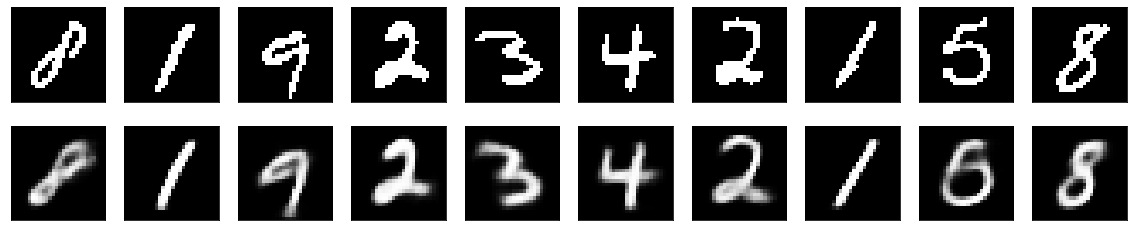

In [14]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(reconstructed[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [17]:
net = VerificationNet(force_learn=False, file_name="../models/verification_model")
_, acc_ae = net.check_predictability(data=reconstructed, correct_labels=y_test)
print(f"Accuracy of Reconstruction: {100 * acc_ae:.2f}%")


/usr/local/anaconda3/envs/tensorflow/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Accuracy of Reconstruction: 84.40%
